# Projet SHS

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading and cleaning

In [2]:
# Load data
num_subjects = pd.read_csv('data/results.csv')
results = pd.read_csv('data/results.csv')
results

,Unnamed: 0.1,sujet1,A,A.1,sujet2,A.2,B,sujet3,B.1,B.2,...,B.33,sujet 33,B.34,A.30,sujet 34,A.31,A.32,sujet 35,A.33,A.34
0,NaN,ordre apparition,premier passage,deuxième passage,ordre apparition,premier passage,deuxième passage,ordre apparition,premier passage,deuxième passage,...,deuxième passage,ordre d'apparition,premier passage,deuxième passage,ordre d'apparition,premier passage,deuxième passage,ordre d'apparition,premier passage,deuxième passage
1,Ampoule,11,NaN,NaN,8,5,3,3,NaN,NaN,...,NaN,20,1,1,10,NaN,NaN,4,NaN,NaN
2,Ananas,18,13,5,16,NaN,NaN,1,1,1,...,9,11,NaN,11,2,10,6,2,5,8
3,Bottes,2,2,11,2,10,NaN,11,NaN,NaN,...,4,14,NaN,NaN,15,8,5,18,NaN,NaN
4,Bouteille,20,8,12,13,NaN,NaN,14,NaN,NaN,...,NaN,2,NaN,NaN,7,NaN,NaN,15,NaN,NaN
5,Briquet,4,NaN,NaN,4,NaN,NaN,8,NaN,NaN,...,NaN,6,10,8,16,NaN,11,9,NaN,NaN
6,Calculatrice,19,9,8,18,NaN,NaN,6,NaN,NaN,...,2,13,NaN,NaN,3,NaN,NaN,12,NaN,NaN
7,Camion,15,7,7,7,2,4,17,4,5,...,NaN,8,8,3,11,9,7,13,10,3
8,Ciseaux,1,1,1,15,NaN,NaN,10,NaN,NaN,...,5,19,2,NaN,5,6,NaN,16,9,7
9,Classeur,7,11,3,11,7,8,4,NaN,NaN,...,6,10,12,4,4,2,2,8,8,1


## Idées analyses

In [3]:
def describe(array):
    return f"\tMoyenne: {np.mean(array)}\n\tMédiane: {np.median(array)}\n\tStd: {np.std(array)}\n\tMin: {np.min(array)}\n\tMax: {np.max(array)}"

forest_env = 'A'
desert_env = 'B'

### 1. Comparer performance forêt et désert

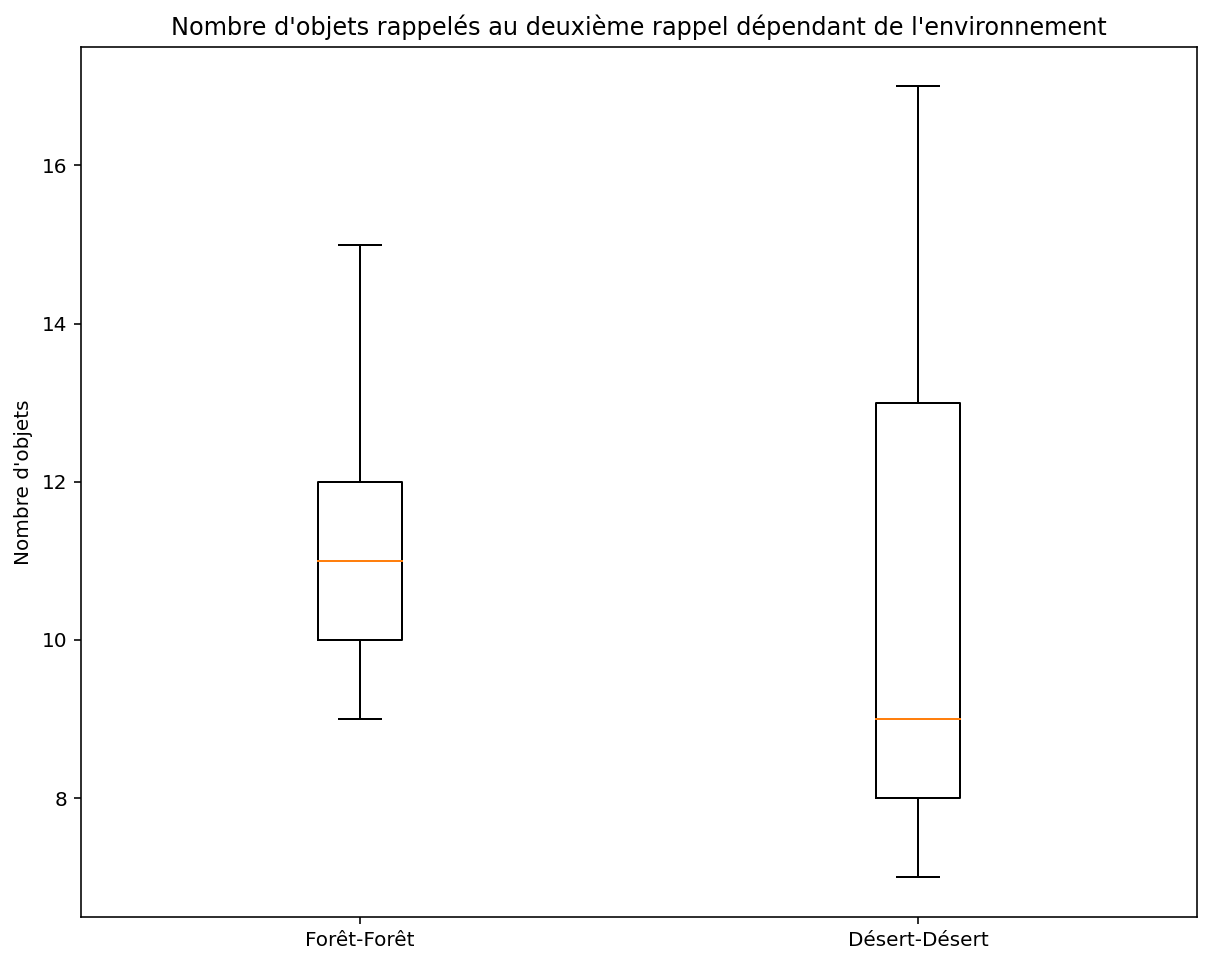

Nombre d'objets rappelés au deuxième rappel dépendant de l'environnement:
- Forêt-Forêt:
	Moyenne: 11.444444444444445
	Médiane: 11.0
	Std: 1.8324913891634047
	Min: 9
	Max: 15
- Désert-Désert:
	Moyenne: 10.777777777777779
	Médiane: 9.0
	Std: 3.705184889007348
	Min: 7
	Max: 17

TTest:
- Ttest_indResult(statistic=0.4561715527618229, pvalue=0.6566232685733011)
- TTest montre que la différence n'est pas significative.


In [4]:
gen = results.T.iterrows()

next(gen)
next(gen)

items = results.loc[1:, results.columns[0]]

scores_forest = []
scores_desert = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    forest = forest_env in first.name and forest_env in second.name
    desert = desert_env in first.name and desert_env in second.name
    
    score = len(second[~second.isnull()])
    
    if forest:
        scores_forest.append(score)
    elif desert:
        scores_desert.append(score)
    
    # Skip apparition
    next(gen, None)

plt.figure(figsize=(10,8), dpi=144)
plt.boxplot([scores_forest, scores_desert], labels=["Forêt-Forêt", "Désert-Désert"])
plt.title("Nombre d'objets rappelés au deuxième rappel dépendant de l'environnement")
plt.ylabel("Nombre d'objets")
plt.savefig("plots/plot1.png")
plt.show()
print(f"Nombre d'objets rappelés au deuxième rappel dépendant de l'environnement:")
print(f"- Forêt-Forêt:\n{describe(scores_forest)}")
print(f"- Désert-Désert:\n{describe(scores_desert)}")

print(f"\nTTest:")
print(f"- {stats.ttest_ind(scores_forest, scores_desert, equal_var=False)}")
print(f"- TTest montre que la différence n'est pas significative.")

### 2. Regarder si le changement de contexte a un impact sur les performances

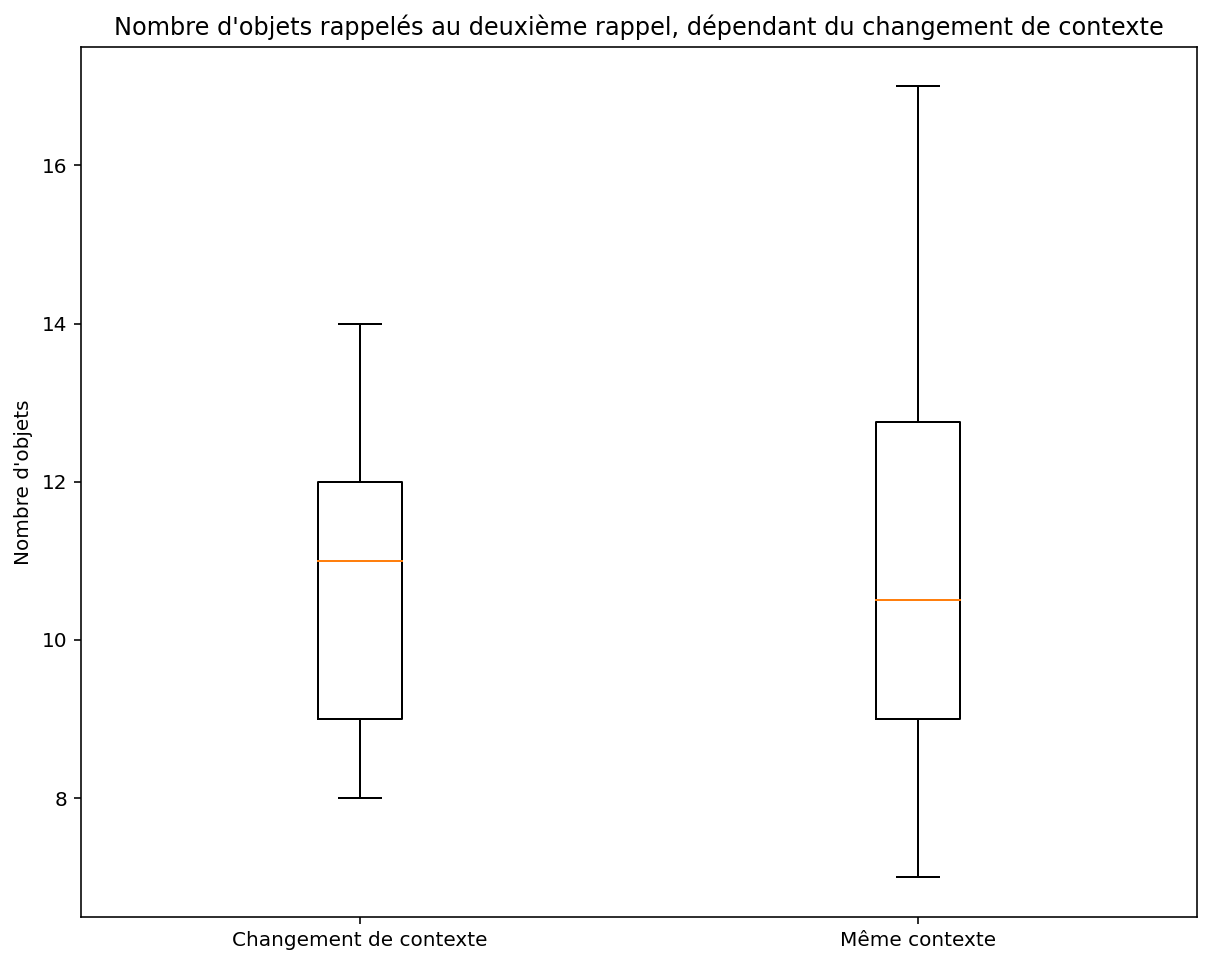

In [5]:
gen = results.T.iterrows()

next(gen)
next(gen)

items = results.loc[1:, results.columns[0]]

scores_change = []
scores_same = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    env_first = forest_env if forest_env in first.name else desert_env
    env_second = forest_env if forest_env in second.name else desert_env
    change = env_first != env_second
    
    score = len(second[~second.isnull()])
    
    if change:
        scores_change.append(score)
    else:
        scores_same.append(score)
    
    # Skip apparition
    next(gen, None)

plt.figure(figsize=(10,8), dpi=144)
plt.boxplot([scores_change, scores_same], labels=["Changement de contexte", "Même contexte"])
plt.title("Nombre d'objets rappelés au deuxième rappel, dépendant du changement de contexte")
plt.ylabel("Nombre d'objets")
plt.savefig("plots/plot2.png")
plt.show()

### 3. Regarder à quel points ils se rappellent des mêmes objets pendant les deux phases de rappel

In [6]:
gen = results.T.iterrows()

next(gen)
next(gen)

items = results.loc[1:, results.columns[0]]

scores_change = []
scores_same = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    env_first = forest_env if forest_env in first.name else desert_env
    env_second = forest_env if forest_env in second.name else desert_env
    change = env_first != env_second
    
    first.index = items
    second.index = items
    
    first = set(first[~first.isnull()].index)
    second = set(second[~second.isnull()].index)
    
    score = 1-len(second - first)/len(second)
    
    if change:
        scores_change.append(score)
    else:
        scores_same.append(score)
    
    # Skip apparition
    next(gen, None)
    
print(f"Proportion d'objets du deuxième rappel qui figuraient déjà dans le premier:")
print(f"- Si même contexte: {100*np.mean(scores_same):.2f}%")
print(f"- Si contexte différent: {100*np.mean(scores_change):.2f}%")

Proportion d'objets du deuxième rappel qui figuraient déjà dans le premier:
- Si même contexte: 86.74%
- Si contexte différent: 91.36%


### 4. Regarder s'ils se rappellent d'autant d'objets les deux fois

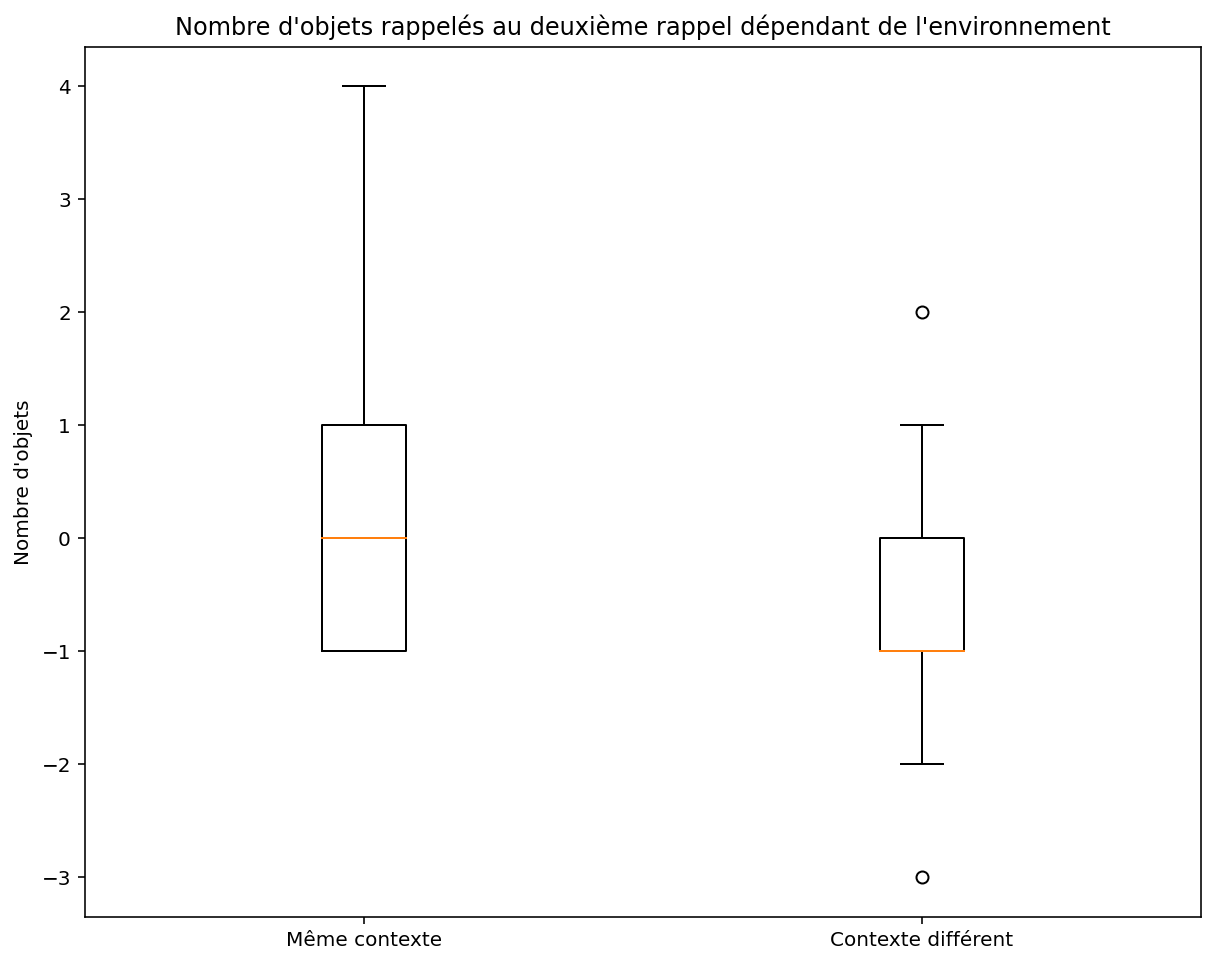

Différence du nombre d'objets rappelés entre le deuxième et le premier (un chiffre négatif signifie qu'il y a eu moins d'objets lors du deuxième rappel, un chiffre positif plus):
- Si même contexte:
	Moyenne: 0.3333333333333333
	Médiane: 0.0
	Std: 1.5634719199411433
	Min: -1
	Max: 4
- Si contexte différent:
	Moyenne: -0.6470588235294118
	Médiane: -1.0
	Std: 1.1345471483521123
	Min: -3
	Max: 2

TTest:
- Ttest_indResult(statistic=2.070344565063579, pvalue=0.04683004392402698)
- TTest montre que en restant dans le même contexte la moyenne est plus grande de manière significative que en changeant.


In [7]:
gen = results.T.iterrows()

next(gen)
next(gen)

scores_change = []
scores_same = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    env_first = forest_env if forest_env in first.name else desert_env
    env_second = forest_env if forest_env in second.name else desert_env
    change = env_first != env_second
    
    first = len(first[~first.isnull()])
    second = len(second[~second.isnull()])
    
    if second-first==-9:
        print(i)
    
    score = second - first
    
    if change:
        scores_change.append(score)
    else:
        scores_same.append(score)
    
    # Skip apparition
    next(gen, None)

plt.figure(figsize=(10,8), dpi=144)
plt.boxplot([scores_same, scores_change], labels=["Même contexte", "Contexte différent"])
plt.title("Nombre d'objets rappelés au deuxième rappel dépendant de l'environnement")
plt.ylabel("Nombre d'objets")
plt.savefig("plots/plot-diff-rappel.png")
plt.show()
print(f"Différence du nombre d'objets rappelés entre le deuxième et le premier (un chiffre négatif signifie qu'il y a eu moins d'objets lors du deuxième rappel, un chiffre positif plus):")
print(f"- Si même contexte:\n{describe(scores_same)}")
print(f"- Si contexte différent:\n{describe(scores_change)}")

print(f"\nTTest:")
print(f"- {stats.ttest_ind(scores_same, scores_change, equal_var=False)}")
print(f"- TTest montre que en restant dans le même contexte la moyenne est plus grande de manière significative que en changeant.")

### 5. Regarder si l'ordre de rappel et d'appartition sont similaires (l'endroit, l'envers, ...) - entre l'apparaition et le premier rappel, apparition et deuxième rappel, premier rappel et deuxième rappel

Similarité de l'ordre entre les deux rappels:
- Si même contexte:
	Moyenne: 4.444444444444445
	Médiane: 4.5
	Std: 1.1653431646335017
	Min: 2
	Max: 6
- Si contexte différent:
	Moyenne: 5.235294117647059
	Médiane: 5.0
	Std: 1.895176905127884
	Min: 3
	Max: 9
- Si données aléatoire:
	Moyenne: 3.235294117647059
	Médiane: 3.0
	Std: 0.9411764705882353
	Min: 2
	Max: 5


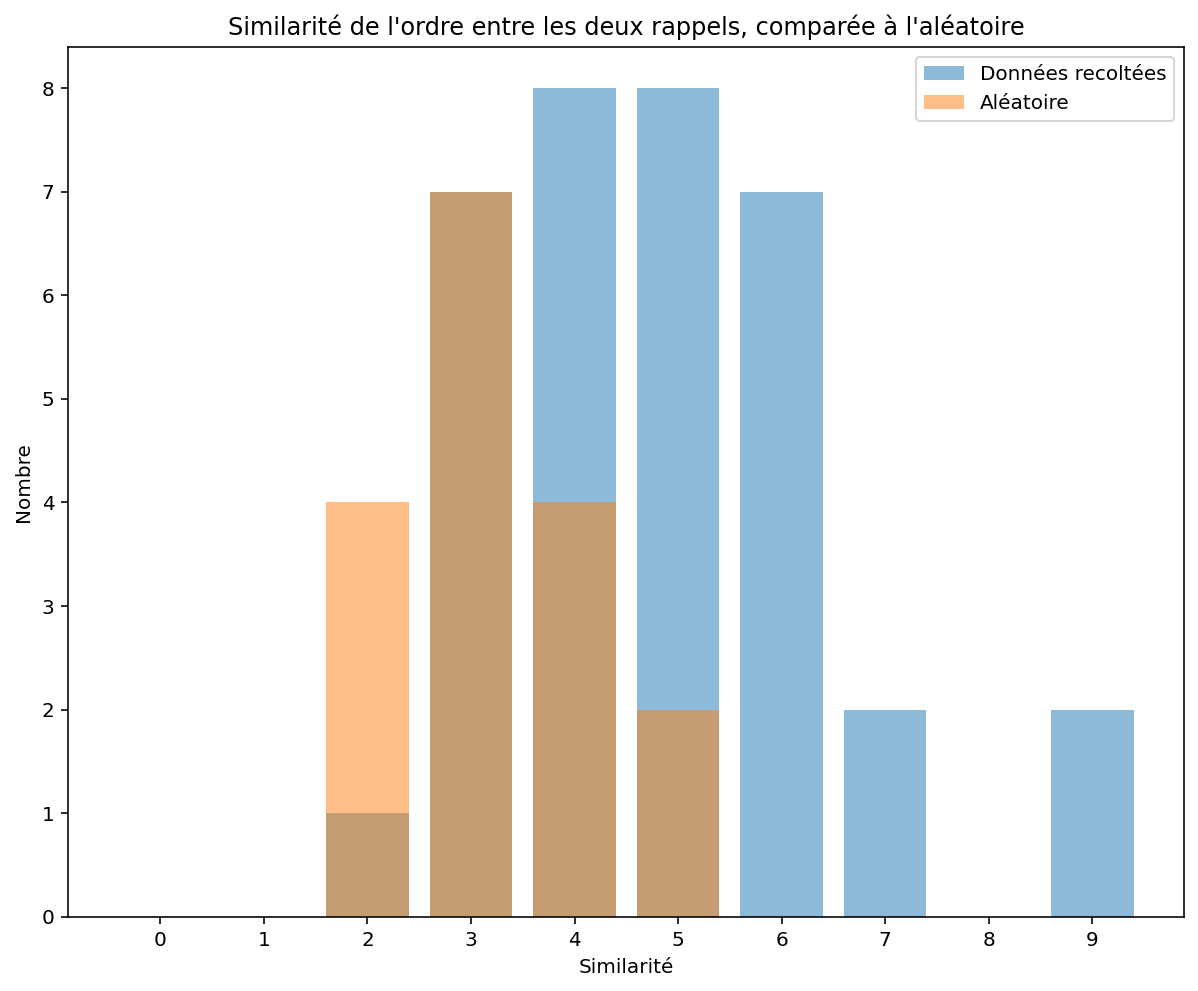

In [8]:
# https://stackoverflow.com/questions/24547641/python-length-of-longest-common-subsequence-of-lists
def lcs_length(a, b):
    table = [[0] * (len(b) + 1) for _ in range(len(a) + 1)]
    for i, ca in enumerate(a, 1):
        for j, cb in enumerate(b, 1):
            table[i][j] = (
                table[i - 1][j - 1] + 1 if ca == cb else
                max(table[i][j - 1], table[i - 1][j]))
    return table[-1][-1]

gen = results.T.iterrows()

next(gen)
next(gen)

items = results.loc[1:, results.columns[0]]

scores_change = []
scores_same = []

for i, row in gen:
    first = row.iloc[1:]
    second = next(gen)[1].iloc[1:]
    
    env_first = forest_env if forest_env in first.name else desert_env
    env_second = forest_env if forest_env in second.name else desert_env
    change = env_first != env_second
    
    first.index = items
    second.index = items
    
    first = first[~first.isnull()].astype(int)
    first.sort_values(inplace=True)
    first = list(first.index)
    
    second = second[~second.isnull()].astype(int)
    second.sort_values(inplace=True)
    second = list(second.index)
    
    first = [item for item in first if item in second]
    second = [item for item in second if item in first]

    score = lcs_length(first, second)
    
    if change:
        scores_change.append(score)
    else:
        scores_same.append(score)
    
    # Skip apparition
    next(gen, None)
    
np.random.seed(1)
sizes = [9, 10, 11, 12, 13]
items = results.loc[1:, results.columns[0]]

scores_random = []

for _ in range(int((len(scores_change) + len(scores_same))/2)):
    first = np.random.choice(items.values, size=np.random.choice(sizes), replace=False)
    second = np.random.choice(items.values, size=np.random.choice(sizes), replace=False)
    
    first = [item for item in first if item in second]
    second = [item for item in second if item in first]

    score = lcs_length(first, second)
    scores_random.append(score)
    

print(f"Similarité de l'ordre entre les deux rappels:")
print(f"- Si même contexte:\n{describe(scores_same)}")
print(f"- Si contexte différent:\n{describe(scores_change)}")
print(f"- Si données aléatoire:\n{describe(scores_random)}")


scores = np.array(scores_change + scores_same)
scores_random = np.array(scores_random)

x = np.arange(np.max(scores)+1)
heights = [len(scores[scores == value]) for value in x]
heights_random = [len(scores_random[scores_random == value]) for value in x]

plt.figure(figsize=(10,8), dpi=144)
plt.bar(x, heights, label='Données recoltées', alpha=0.5)
plt.bar(x, heights_random, label='Aléatoire', alpha=0.5)
plt.xticks(x)
plt.legend()
plt.title("Similarité de l'ordre entre les deux rappels, comparée à l'aléatoire")
plt.xlabel("Similarité")
plt.ylabel("Nombre")
plt.savefig("plots/plot3.png")
plt.show()

Pour calculer la similarité on calcule la taille de la plus grande sub-list ordrée où l'on permet les oublis.

On peut voir qu'il y a un taut de similarité plus important qu'avec l'aléatoire.

### 6. Étudier l'effet de primauté et récence

In [9]:
def separate_context(df, same_context=True):
    indices = []
    i = 0
    for ind, row in df.iterrows():
        if i % 3 == 0:
            index_order = ind
        if i % 3 == 1:
            first_context = 'A' if 'A' in ind else 'B'
            index_first = ind
        if i % 3 == 2:
            second_context = 'A' if 'A' in ind else 'B'
            index_second = ind
            
            if (first_context == second_context) == same_context:
                indices.append(index_order)
                indices.append(index_first)
                indices.append(index_second)
        
        i += 1
        
    return df.loc[indices]

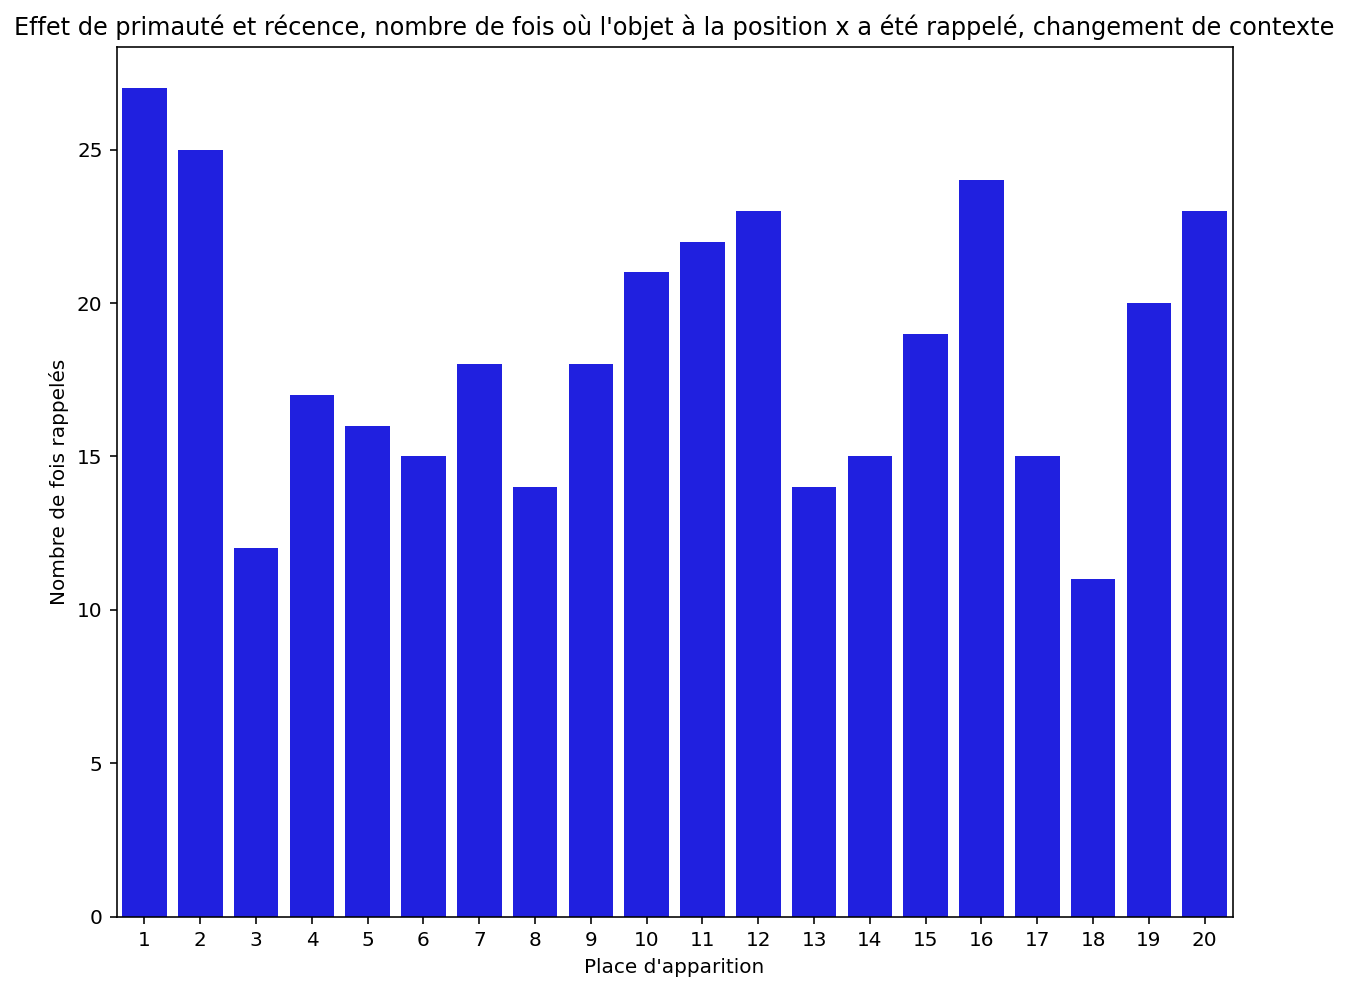

In [10]:
data = results.loc[:, results.columns[1:]]
data = separate_context(data.T, False).T

order_appear = data.loc[:, data.columns[::3]].values[1:].reshape(-1)
first_recall = data.loc[:, data.columns[1::3]].values[1:].reshape(-1)
second_recall = data.loc[:, data.columns[2::3]].values[1:].reshape(-1)

na_mask = np.vectorize(pd.isna)

items_recalled = list(order_appear[~na_mask(first_recall)].astype(int)) + list(order_appear[~na_mask(second_recall)].astype(int))

plt.figure(figsize=(10,8), dpi=144)
sns.countplot(items_recalled, color='blue')
plt.title("Effet de primauté et récence, nombre de fois où l'objet à la position x a été rappelé, changement de contexte")
plt.xlabel("Place d'apparition")
plt.ylabel("Nombre de fois rappelés")
plt.savefig("plots/plot4-1.png")
plt.show()

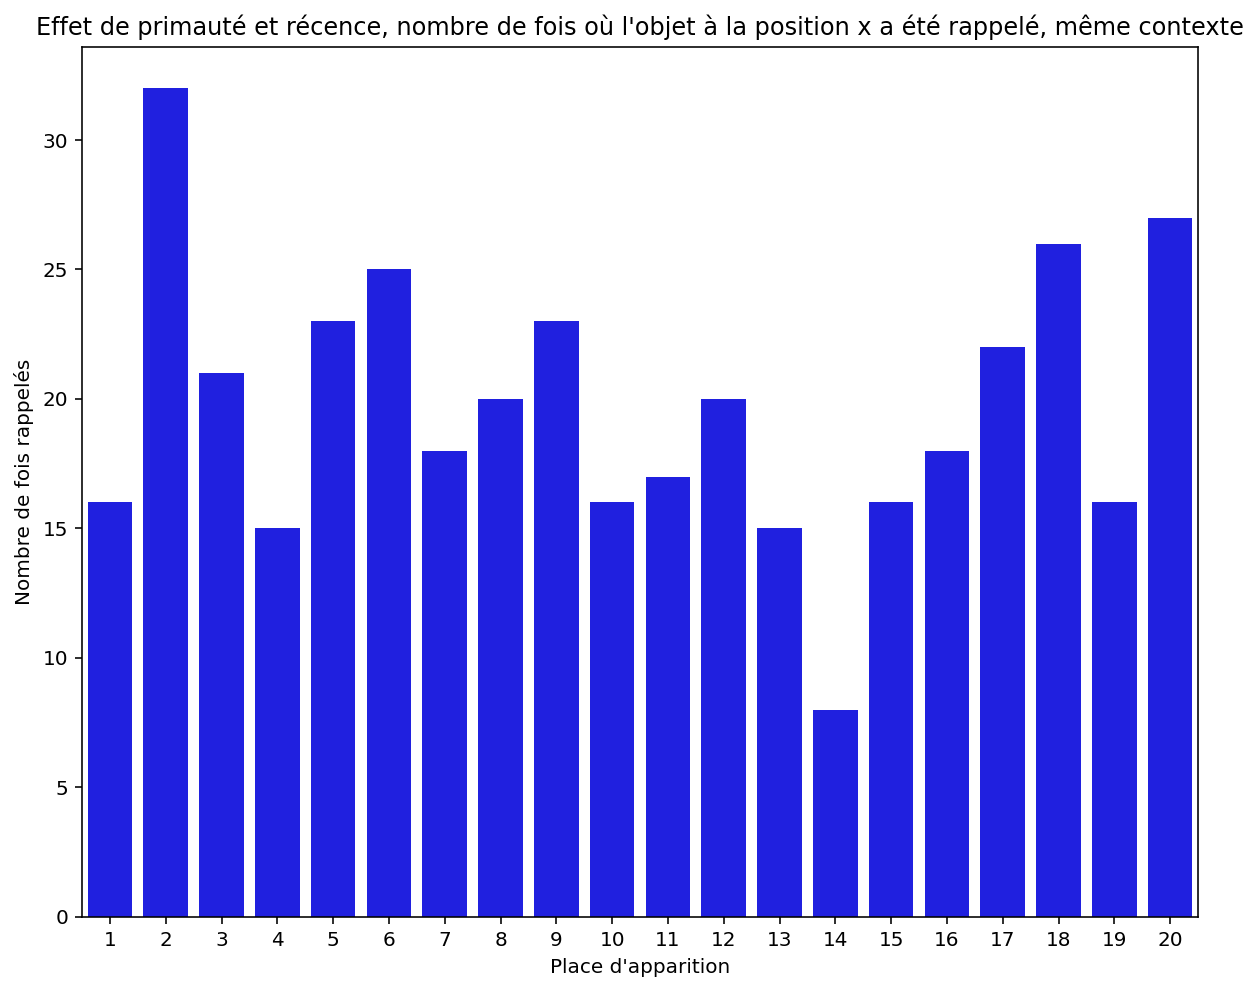

In [11]:
data = results.loc[:, results.columns[1:]]
data = separate_context(data.T, True).T

order_appear = data.loc[:, data.columns[::3]].values[1:].reshape(-1)
first_recall = data.loc[:, data.columns[1::3]].values[1:].reshape(-1)
second_recall = data.loc[:, data.columns[2::3]].values[1:].reshape(-1)

na_mask = np.vectorize(pd.isna)

items_recalled = list(order_appear[~na_mask(first_recall)].astype(int)) + list(order_appear[~na_mask(second_recall)].astype(int))

plt.figure(figsize=(10,8), dpi=144)
sns.countplot(items_recalled, color='blue')
plt.title("Effet de primauté et récence, nombre de fois où l'objet à la position x a été rappelé, même contexte")
plt.xlabel("Place d'apparition")
plt.ylabel("Nombre de fois rappelés")
plt.savefig("plots/plot4-2.png")
plt.show()

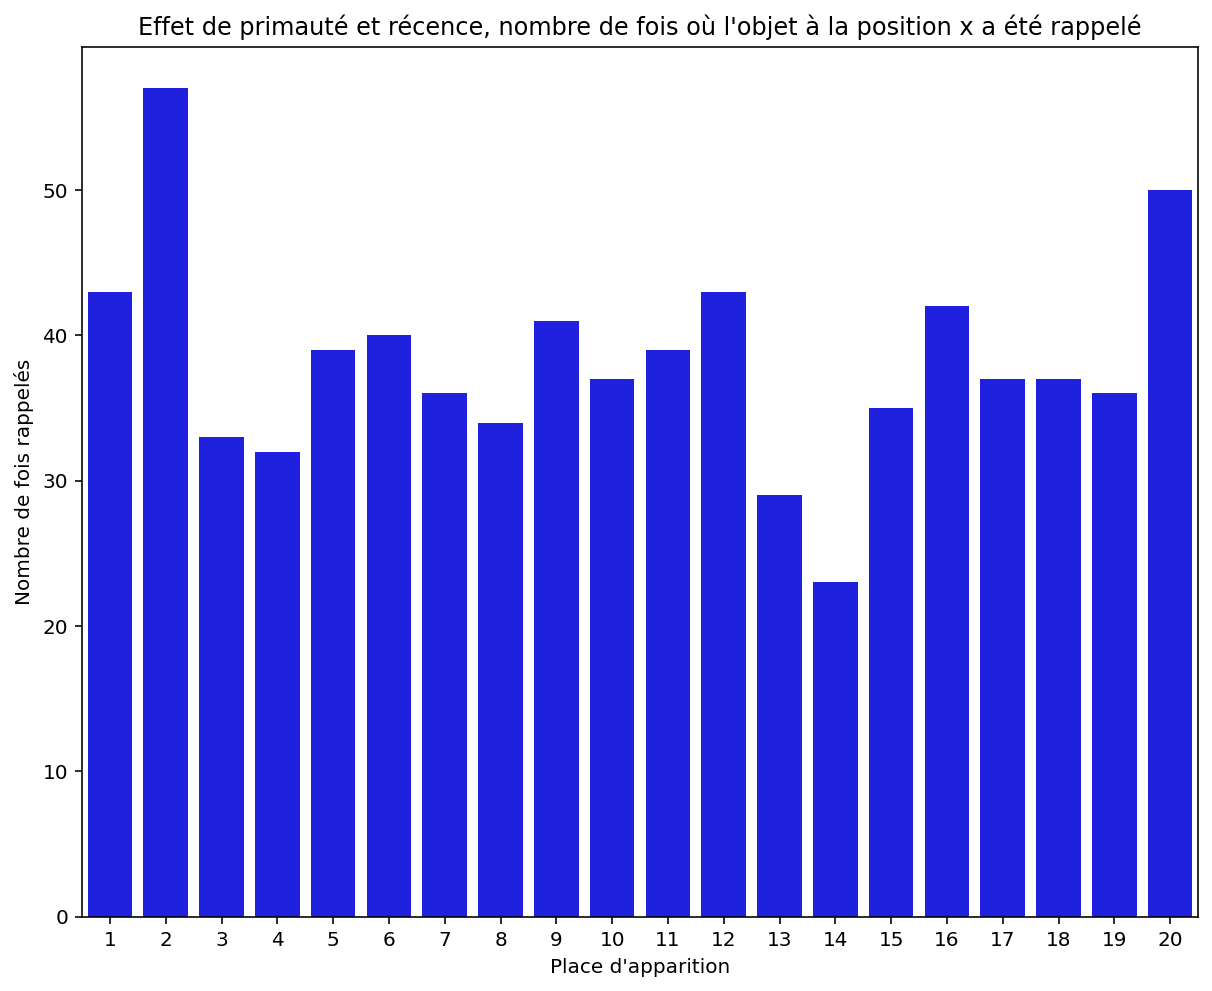

In [12]:
data = results.loc[:, results.columns[1:]]

order_appear = data.loc[:, data.columns[::3]].values[1:].reshape(-1)
first_recall = data.loc[:, data.columns[1::3]].values[1:].reshape(-1)
second_recall = data.loc[:, data.columns[2::3]].values[1:].reshape(-1)

na_mask = np.vectorize(pd.isna)

items_recalled = list(order_appear[~na_mask(first_recall)].astype(int)) + list(order_appear[~na_mask(second_recall)].astype(int))

plt.figure(figsize=(10,8), dpi=144)
sns.countplot(items_recalled, color='blue')
plt.title("Effet de primauté et récence, nombre de fois où l'objet à la position x a été rappelé")
plt.xlabel("Place d'apparition")
plt.ylabel("Nombre de fois rappelés")
plt.savefig("plots/plot4-3.png")
plt.show()

### 7. Regarder si certains objets sont plus cités que d'autres

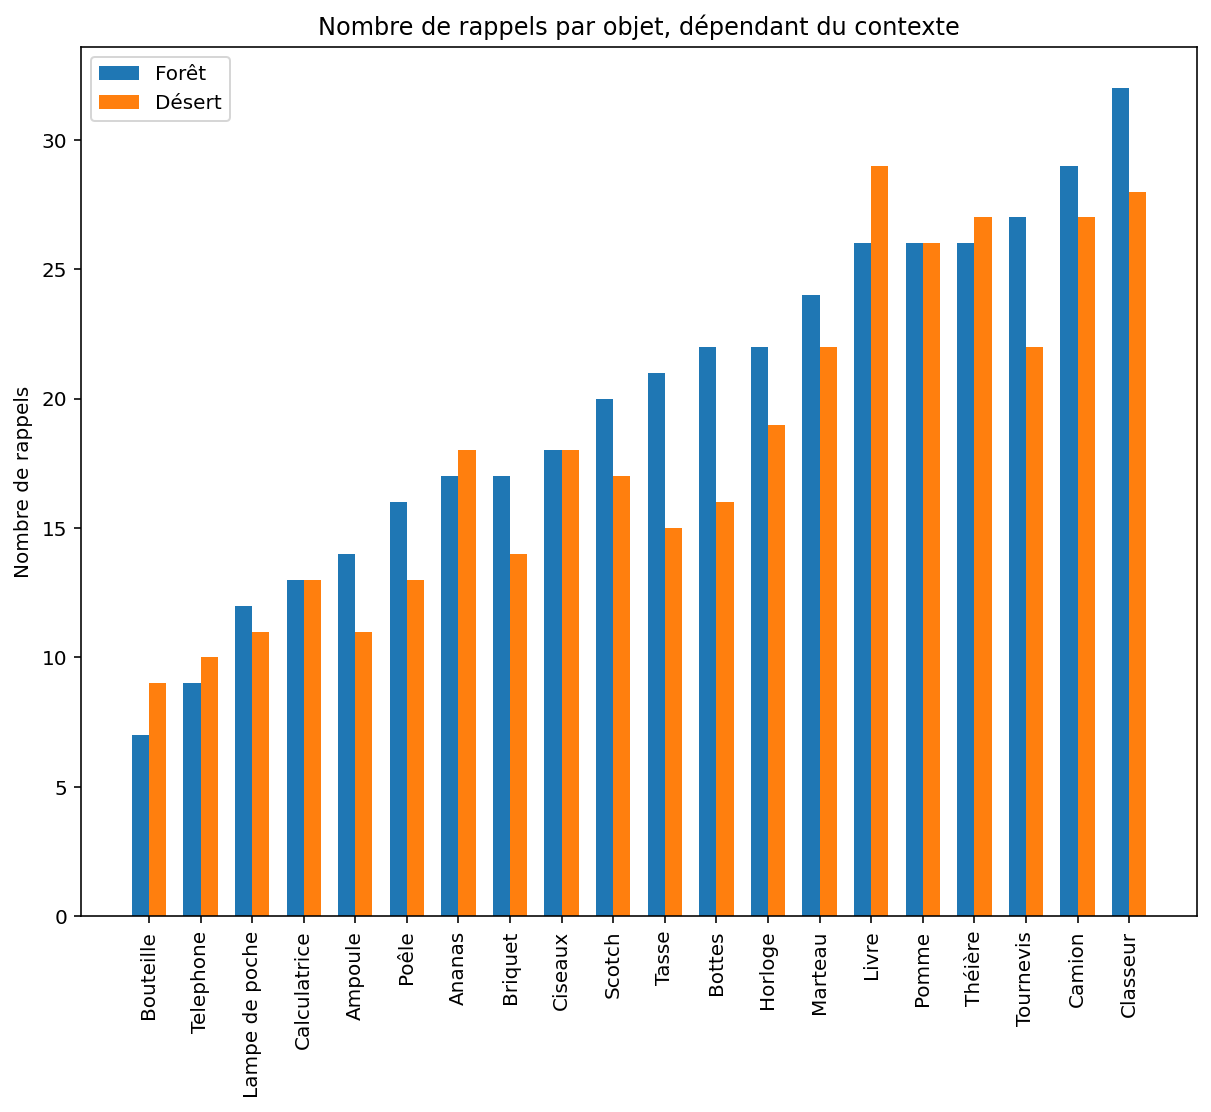

In [13]:
object_apperance = results.loc[1:, results.columns[2::3]].T
object_apperance = pd.concat((object_apperance, results.loc[1:, results.columns[3::3]].T))
object_apperance.columns = results.loc[1:, results.columns[0]]

forest_index = object_apperance.index[object_apperance.index.str.contains(forest_env)]
object_forest = object_apperance.loc[forest_index]
desert_index = object_apperance.index[object_apperance.index.str.contains(desert_env)]
object_desert = object_apperance.loc[desert_index]

object_forest = (~object_forest.isnull()).sum()
object_desert = (~object_desert.isnull()).sum()

values_forest = list(zip(object_forest.index, object_forest.values))
values_forest = list(sorted(values_forest, key=lambda x: x[1]))
items = [value[0] for value in values_forest]
counts_forest = [value[1] for value in values_forest]
counts_desert = [object_desert[item] for item in items]

x = np.arange(len(items))
width = np.min(np.diff(x))/3

plt.figure(figsize=(10,8), dpi=144)
plt.bar(x-width/2, counts_forest, width, label="Forêt")
plt.bar(x+width/2, counts_desert, width, label="Désert")
plt.xticks(x, items, rotation=90)
plt.title("Nombre de rappels par objet, dépendant du contexte")
plt.ylabel("Nombre de rappels")
plt.legend()
plt.savefig("plots/plot5.png")
plt.show()

### 8. Regarder si les gens se rappellent de certaines catégories (par exemple tous les outils, tous les ustensiles, couleur, charactéristique commune), ou alors si tous les outils sont dits ensemble lors des rappels, etc...

In [14]:
groups = {
    'outils': ['Tournevis', 'Marteau'],
    'cuisine': ['Théière', 'Poêle', 'Tasse'],
    'fruits': ['Pomme', 'Ananas'],
    'école': ['Scotch', 'Classeur', 'Calculatrice', 'Ciseaux', 'Livre'],
    'ménager': ['Horloge', 'Ampoule'],
    'lumière': ['Briquet', 'Ampoule', 'Lampe de poche']
}

In [15]:
def separate_context(df, same_context=True):
    indices = []
    i = 0
    for ind, row in df.iterrows():
        i += 1

        context = 'A' if 'A' in ind else 'B'

        if i % 2 == 0:
            if (context == previous) == same_context:
                indices.append(previous_ind)
                indices.append(ind)

        previous = context
        previous_ind = ind
        
    return df.loc[indices]

#### Ecole

In [16]:
def plot_ecole(recalls, recalls_random, title, index):
    size = len(recalls)
    three = ((~recalls.T.isnull()).sum() == 3).sum()
    four = ((~recalls.T.isnull()).sum() == 4).sum()
    five = ((~recalls.T.isnull()).sum() == 5).sum()
    percent = (three + four + five)/size

    three_random = ((~recalls_random.T.isnull()).sum() == 3).sum()
    four_random = ((~recalls_random.T.isnull()).sum() == 4).sum()
    five_random = ((~recalls_random.T.isnull()).sum() == 5).sum()
    percent_random = (three_random + four_random + five_random)/size


    x = [3, 4, 5]
    heights = [three, four, five]
    heights_random = [three_random, four_random, five_random]

    plt.figure(figsize=(10,8), dpi=144)
    plt.bar(x, heights, label='Ecole')
    plt.bar(x, heights_random, label='Aléatoire')
    plt.xticks(x)
    plt.legend()
    plt.title(title)
    plt.xlabel("Nombre d'objets")
    plt.ylabel("Nombre de rappels")
    plt.savefig(f"plots/plot6-{index}.png")
    plt.show()
    print(f"Pourcentage de rappels de 3 objets ou plus:\n\tPour école: {percent*100:.2f}%\n\tPour aléatoire ({', '.join(cluster_random)}): {percent_random*100:.2f}%")

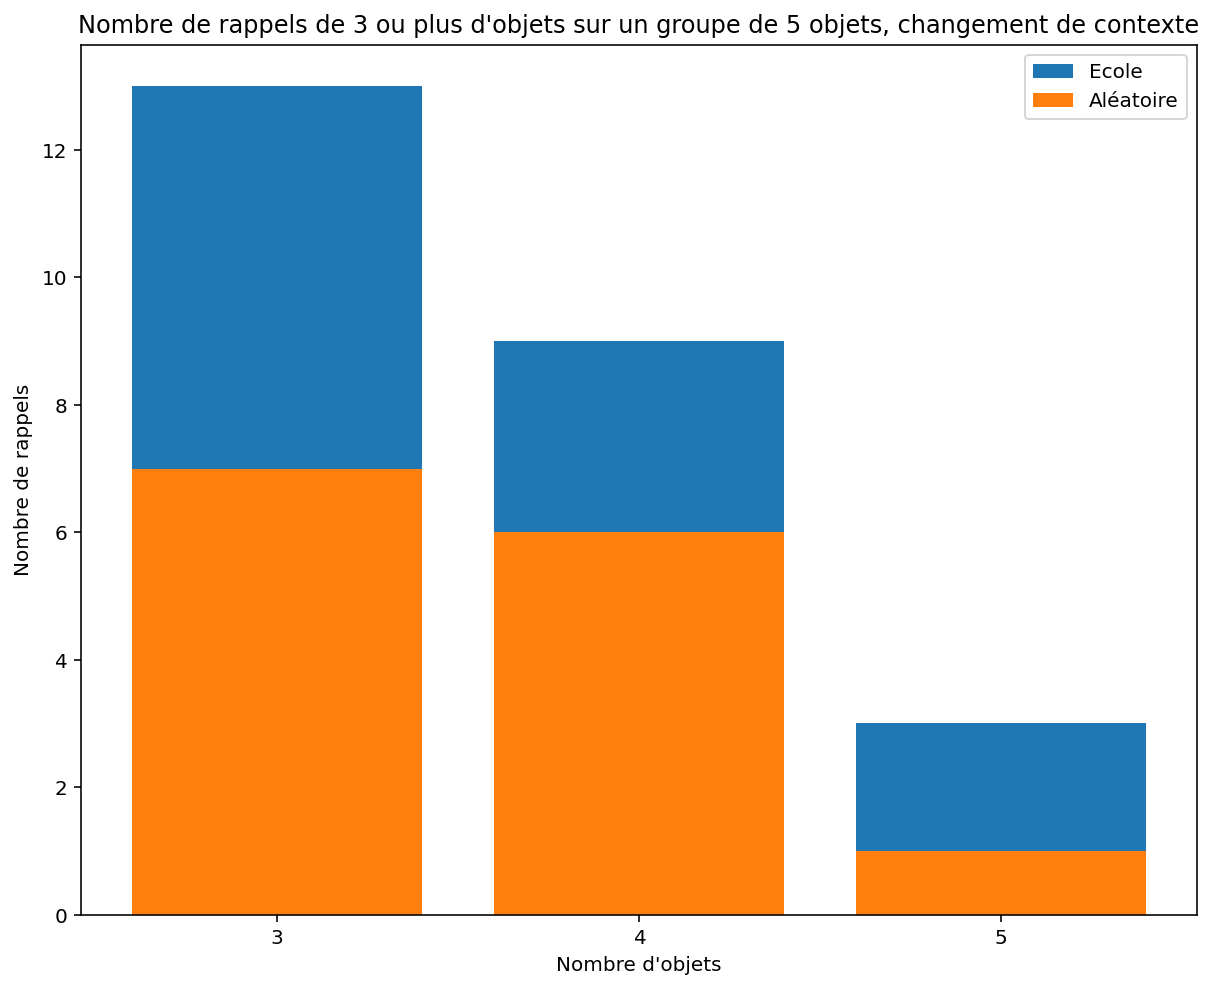

Pourcentage de rappels de 3 objets ou plus:
	Pour école: 65.79%
	Pour aléatoire (Bouteille, Tasse, Camion, Lampe de poche, Bottes): 36.84%


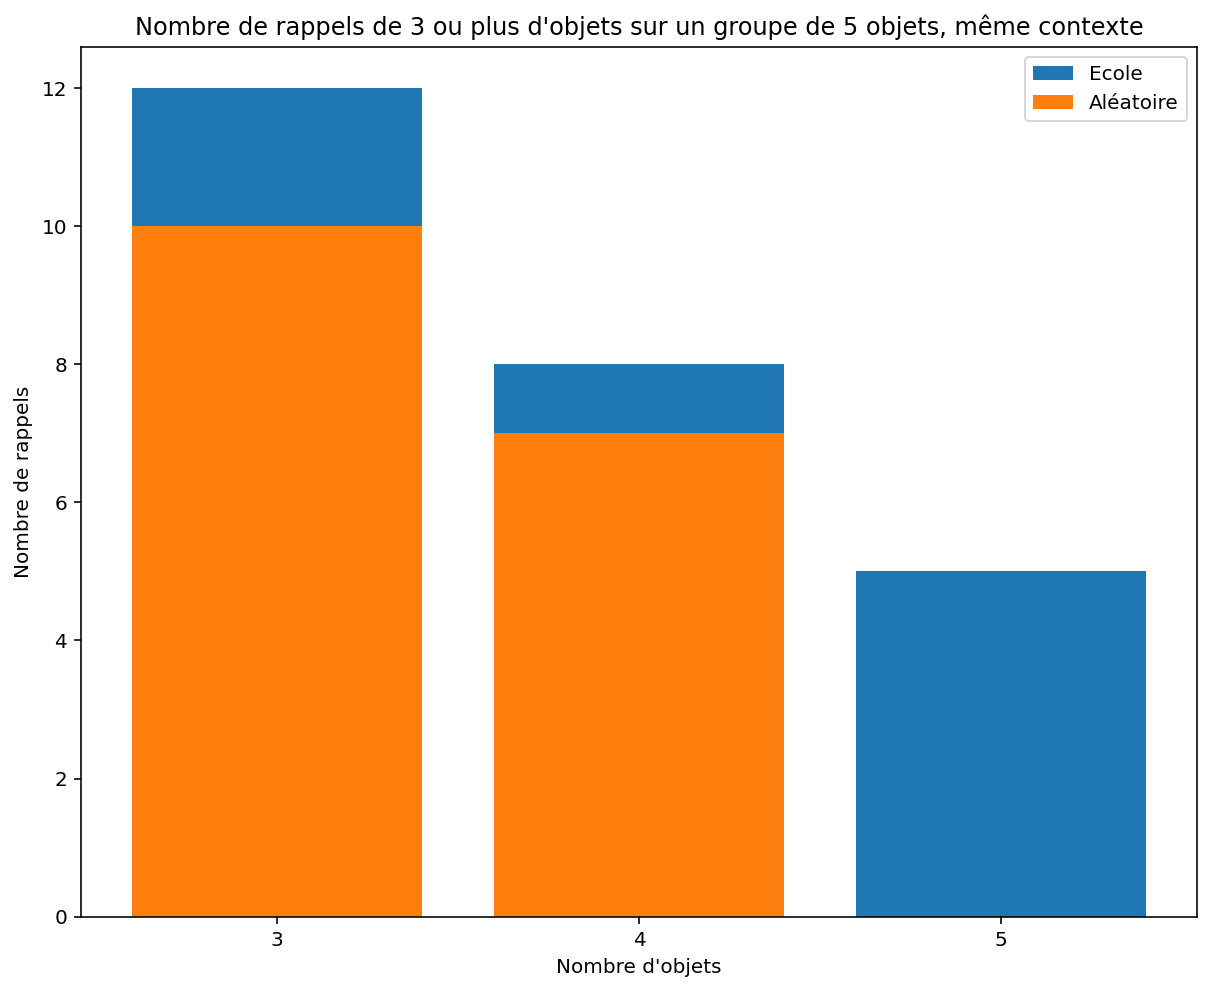

Pourcentage de rappels de 3 objets ou plus:
	Pour école: 78.12%
	Pour aléatoire (Bouteille, Tasse, Camion, Lampe de poche, Bottes): 53.12%


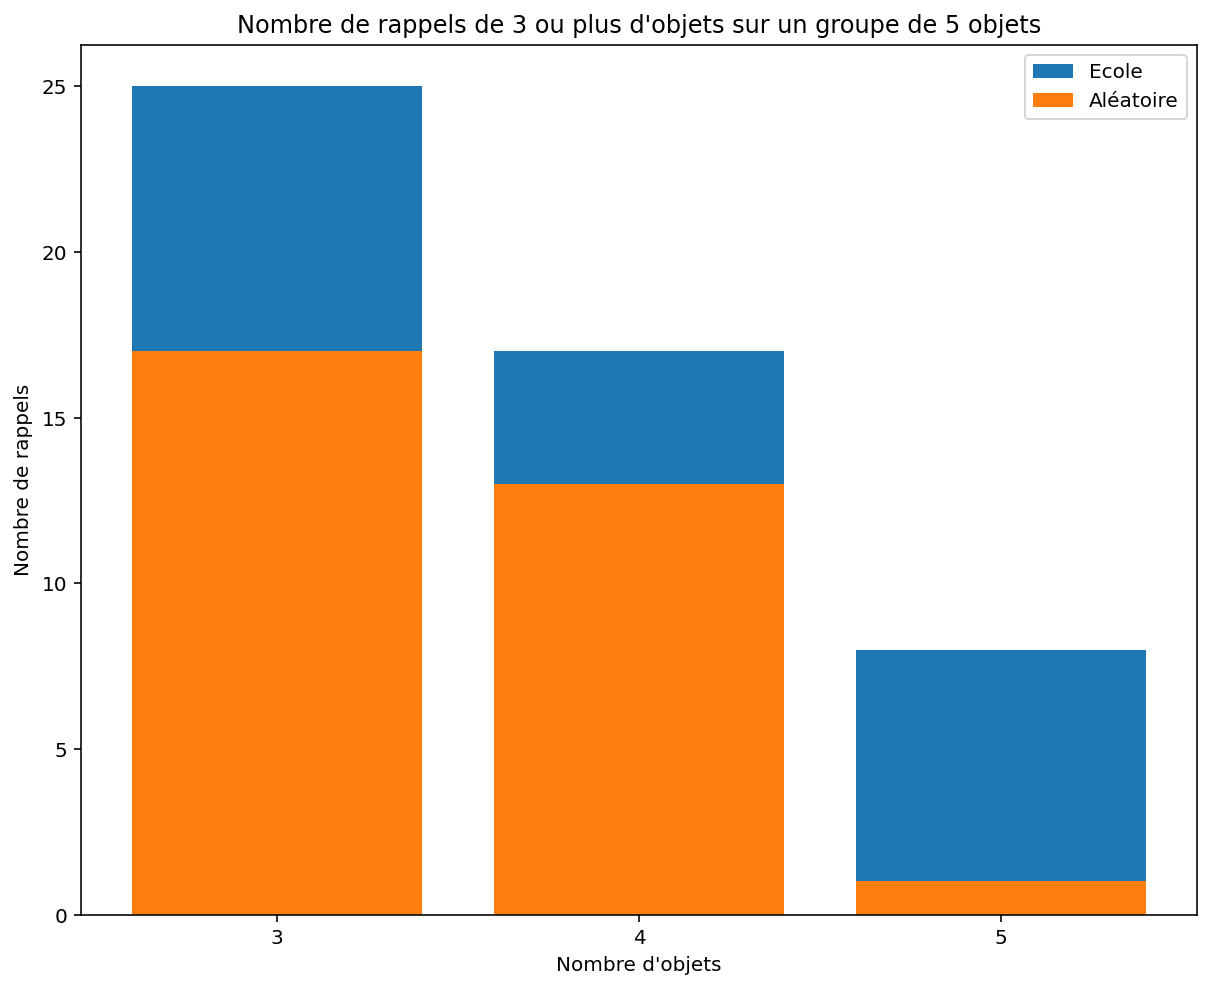

Pourcentage de rappels de 3 objets ou plus:
	Pour école: 71.43%
	Pour aléatoire (Bouteille, Tasse, Camion, Lampe de poche, Bottes): 44.29%


In [17]:
np.random.seed(1)

items = results.loc[1:, results.columns[0]]

cluster_ecole = groups['école']
cluster_random = np.random.choice(items, size=len(cluster_ecole), replace=False)

recalls = results.loc[1:, results.columns[2::3]].T
recalls = pd.concat((recalls, results.loc[1:, results.columns[3::3]].T))
recalls.columns = results.loc[1:, results.columns[0]]
recalls = recalls.loc[:, cluster_ecole]

recalls_random = results.loc[1:, results.columns[2::3]].T
recalls_random = pd.concat((recalls_random, results.loc[1:, results.columns[3::3]].T))
recalls_random.columns = results.loc[1:, results.columns[0]]
recalls_random = recalls_random.loc[:, cluster_random]

plot_ecole(separate_context(recalls, False), separate_context(recalls_random, False), "Nombre de rappels de 3 ou plus d'objets sur un groupe de 5 objets, changement de contexte", 1)
plot_ecole(separate_context(recalls, True), separate_context(recalls_random, True), "Nombre de rappels de 3 ou plus d'objets sur un groupe de 5 objets, même contexte", 2)
plot_ecole(recalls, recalls_random, "Nombre de rappels de 3 ou plus d'objets sur un groupe de 5 objets", 3)

#### Outils

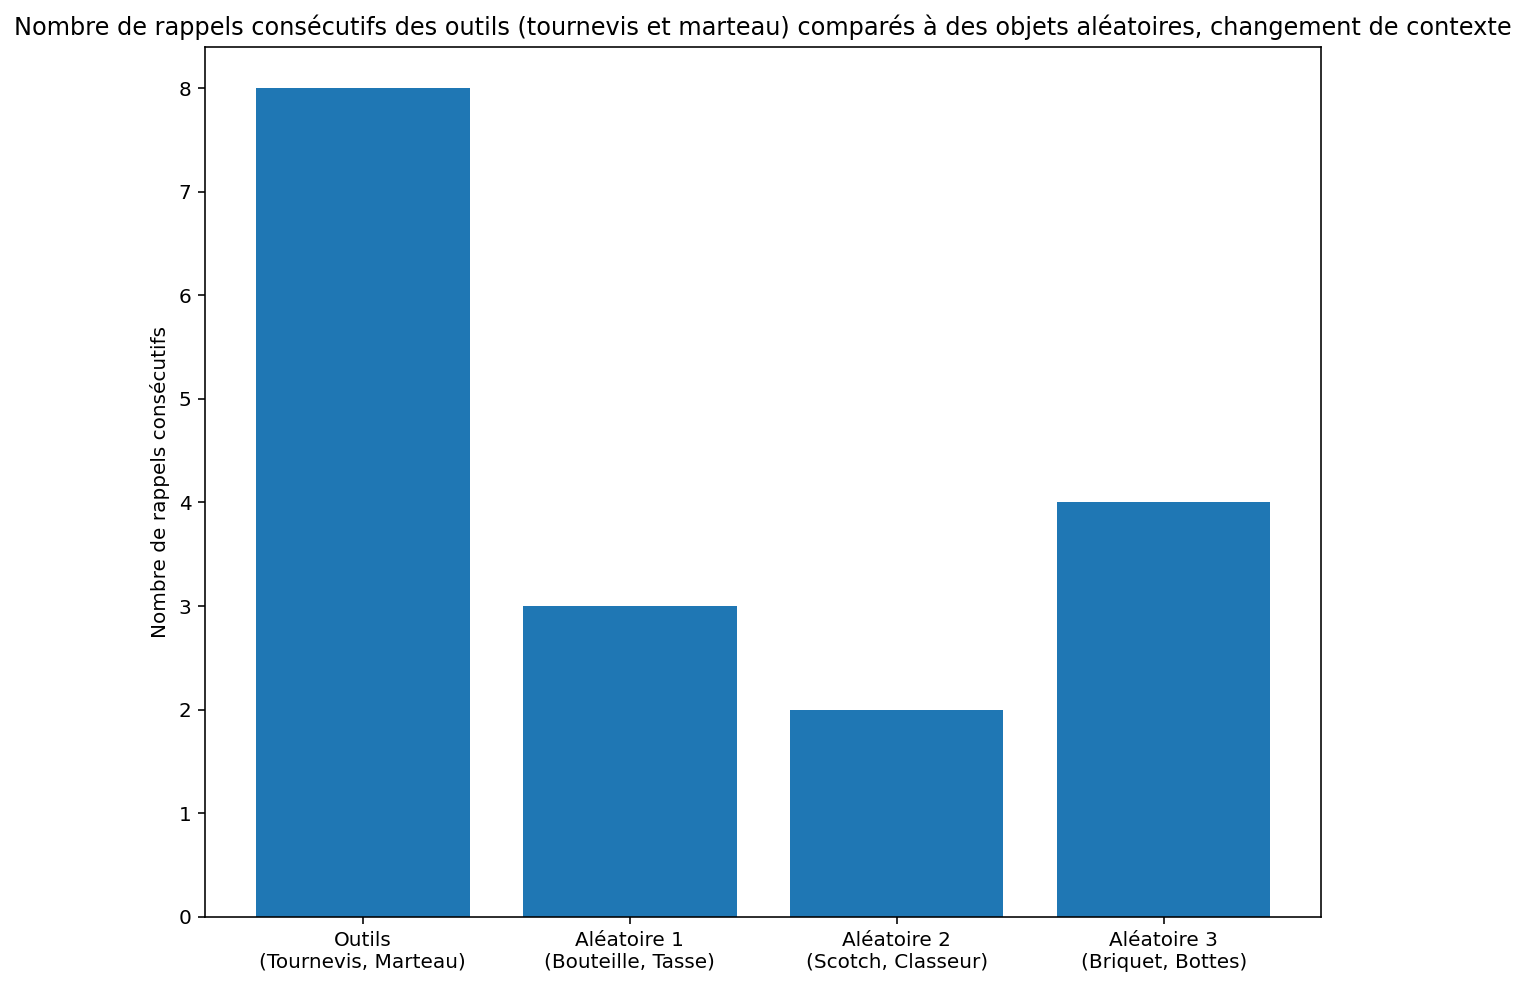

Pourcentage de rappels consécutifs:
	Pour outils: 21.05%
	Pour aléatoire: 7.89%


In [18]:
np.random.seed(1)

items = results.loc[1:, results.columns[0]]

cluster_outils = groups['outils']

data = results.loc[1:, results.columns[2::3]].T
data = pd.concat((data, results.loc[1:, results.columns[3::3]].T))
data.columns = results.loc[1:, results.columns[0]]

data = separate_context(data, False)

recalls = data.loc[:, cluster_outils]

size = len(recalls)

tournevis = recalls['Tournevis'].fillna(-100).astype(int)
marteau = recalls['Marteau'].fillna(-100).astype(int)
distances = tournevis - marteau
counts = (np.abs(distances) == 1).sum()
percent = counts / size

x = [f"Outils\n({', '.join(cluster_outils)})"]
heights = [counts]

for i in range(3):
    cluster = np.random.choice(items, size=len(cluster_outils), replace=False)
    recalls = data.loc[:, cluster]

    objet0 = recalls[cluster[0]].fillna(-100).astype(int)
    objet1 = recalls[cluster[1]].fillna(-100).astype(int)
    distances = objet0 - objet1
    counts = (np.abs(distances) == 1).sum()
    
    x.append(f"Aléatoire {i+1}\n({', '.join(cluster)})")
    heights.append(counts)

plt.figure(figsize=(10,8), dpi=144)
plt.bar(x, heights)
plt.xticks(x)
plt.title("Nombre de rappels consécutifs des outils (tournevis et marteau) comparés à des objets aléatoires, changement de contexte")
plt.ylabel("Nombre de rappels consécutifs")
plt.savefig("plots/plot7-1.png")
plt.show()
print(f"Pourcentage de rappels consécutifs:\n\tPour outils: {percent*100:.2f}%\n\tPour aléatoire: {np.mean(heights[1:])/size*100:.2f}%")

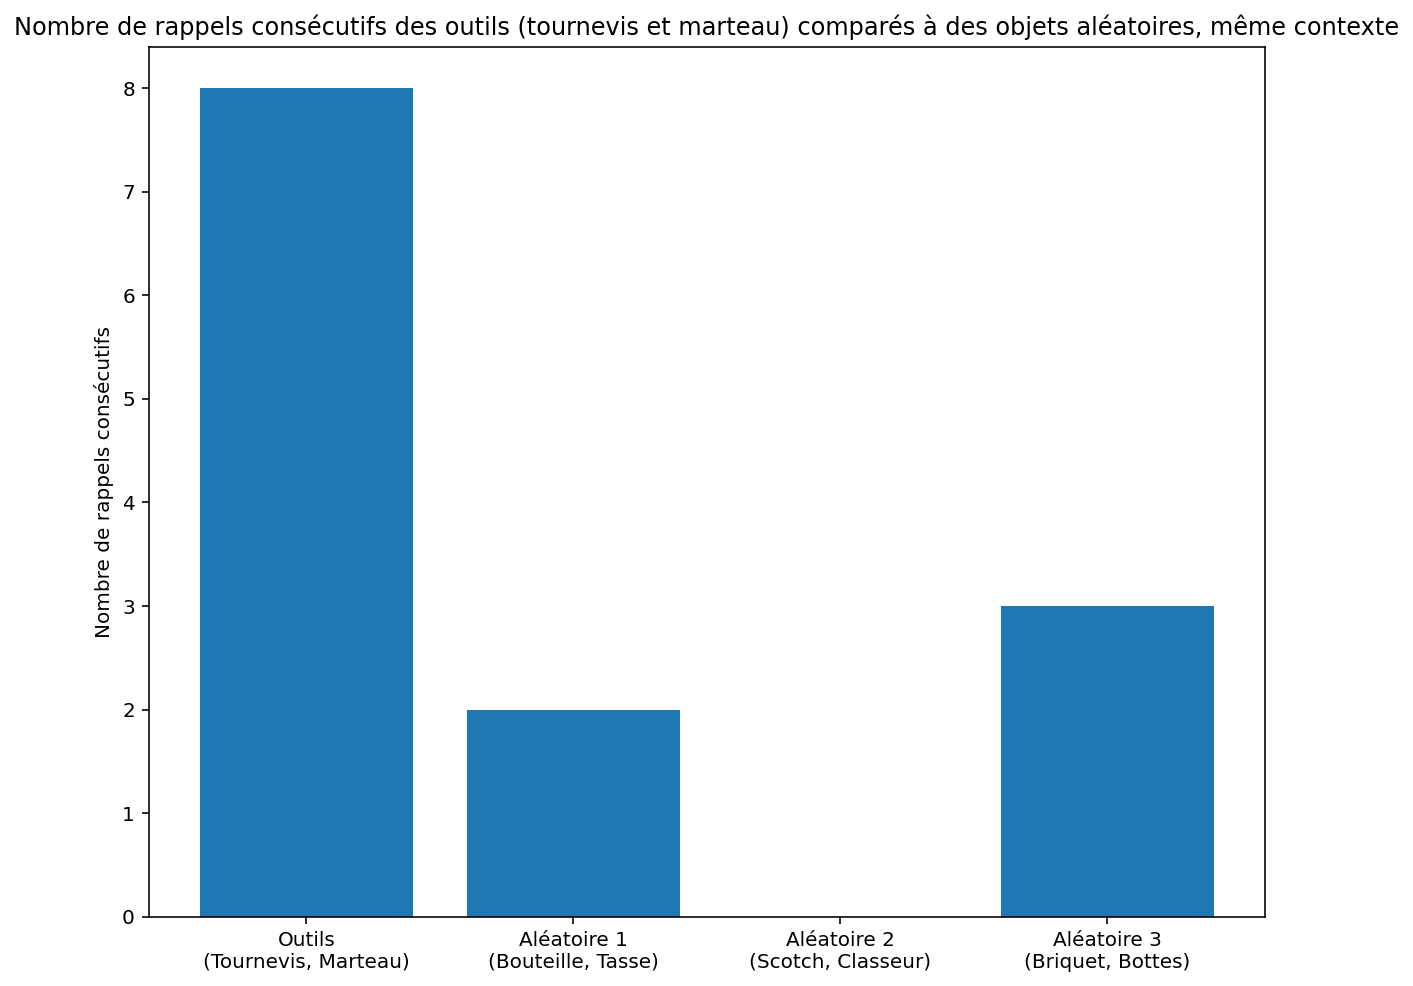

Pourcentage de rappels consécutifs:
	Pour outils: 25.00%
	Pour aléatoire: 5.21%


In [19]:
np.random.seed(1)

items = results.loc[1:, results.columns[0]]

cluster_outils = groups['outils']

data = results.loc[1:, results.columns[2::3]].T
data = pd.concat((data, results.loc[1:, results.columns[3::3]].T))
data.columns = results.loc[1:, results.columns[0]]

data = separate_context(data, True)

recalls = data.loc[:, cluster_outils]

size = len(recalls)

tournevis = recalls['Tournevis'].fillna(-100).astype(int)
marteau = recalls['Marteau'].fillna(-100).astype(int)
distances = tournevis - marteau
counts = (np.abs(distances) == 1).sum()
percent = counts / size

x = [f"Outils\n({', '.join(cluster_outils)})"]
heights = [counts]

for i in range(3):
    cluster = np.random.choice(items, size=len(cluster_outils), replace=False)
    recalls = data.loc[:, cluster]

    objet0 = recalls[cluster[0]].fillna(-100).astype(int)
    objet1 = recalls[cluster[1]].fillna(-100).astype(int)
    distances = objet0 - objet1
    counts = (np.abs(distances) == 1).sum()
    
    x.append(f"Aléatoire {i+1}\n({', '.join(cluster)})")
    heights.append(counts)

plt.figure(figsize=(10,8), dpi=144)
plt.bar(x, heights)
plt.xticks(x)
plt.title("Nombre de rappels consécutifs des outils (tournevis et marteau) comparés à des objets aléatoires, même contexte")
plt.ylabel("Nombre de rappels consécutifs")
plt.savefig("plots/plot7-2.png")
plt.show()
print(f"Pourcentage de rappels consécutifs:\n\tPour outils: {percent*100:.2f}%\n\tPour aléatoire: {np.mean(heights[1:])/size*100:.2f}%")

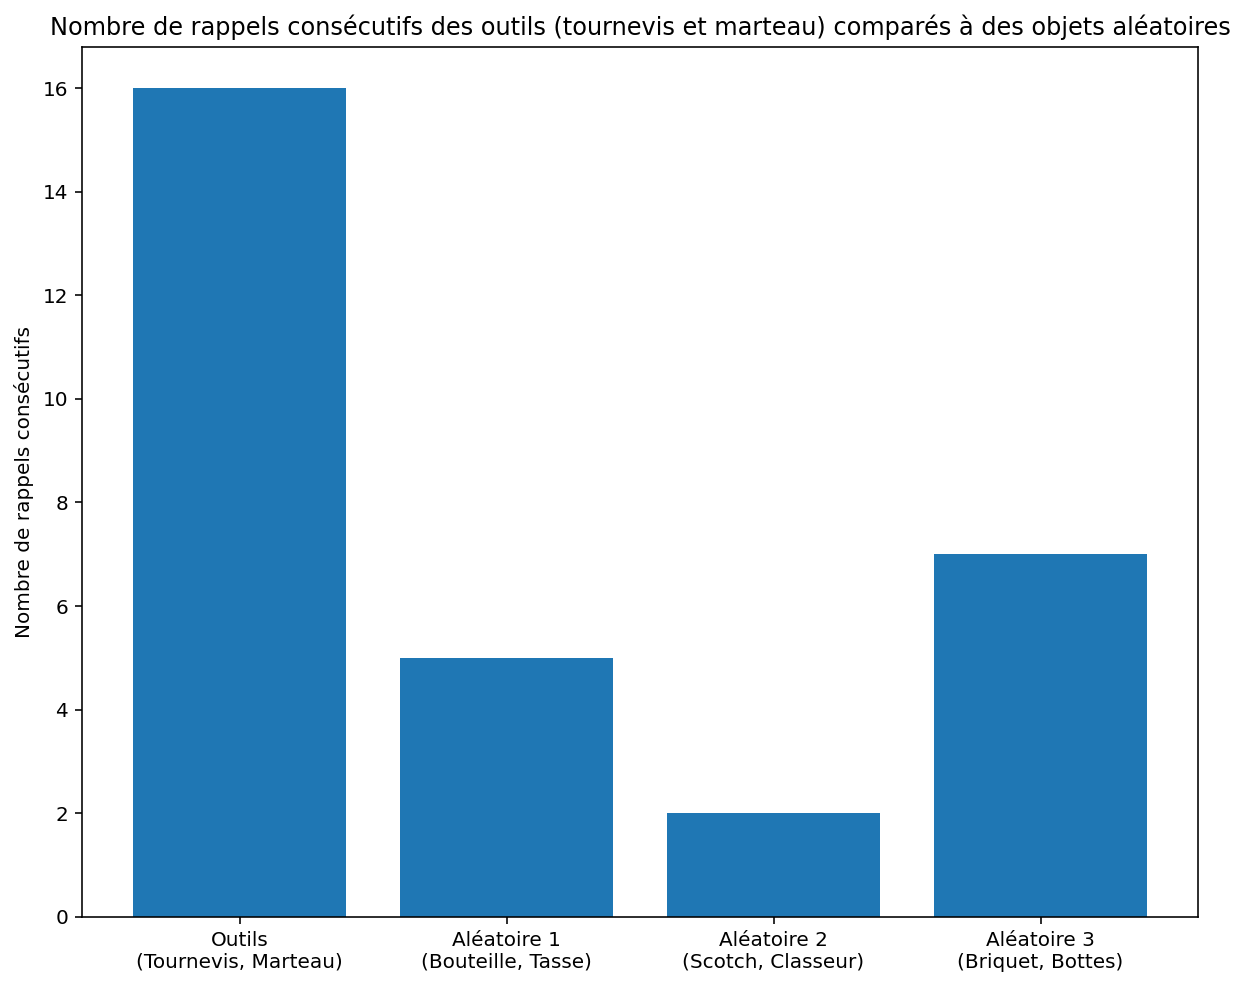

Pourcentage de rappels consécutifs:
	Pour outils: 22.86%
	Pour aléatoire: 6.67%


In [20]:
np.random.seed(1)

items = results.loc[1:, results.columns[0]]

cluster_outils = groups['outils']

data = results.loc[1:, results.columns[2::3]].T
data = pd.concat((data, results.loc[1:, results.columns[3::3]].T))
data.columns = results.loc[1:, results.columns[0]]

recalls = data.loc[:, cluster_outils]

size = len(recalls)

tournevis = recalls['Tournevis'].fillna(-100).astype(int)
marteau = recalls['Marteau'].fillna(-100).astype(int)
distances = tournevis - marteau
counts = (np.abs(distances) == 1).sum()
percent = counts / size

x = [f"Outils\n({', '.join(cluster_outils)})"]
heights = [counts]

for i in range(3):
    cluster = np.random.choice(items, size=len(cluster_outils), replace=False)
    recalls = data.loc[:, cluster]

    objet0 = recalls[cluster[0]].fillna(-100).astype(int)
    objet1 = recalls[cluster[1]].fillna(-100).astype(int)
    distances = objet0 - objet1
    counts = (np.abs(distances) == 1).sum()
    
    x.append(f"Aléatoire {i+1}\n({', '.join(cluster)})")
    heights.append(counts)

plt.figure(figsize=(10,8), dpi=144)
plt.bar(x, heights)
plt.xticks(x)
plt.title("Nombre de rappels consécutifs des outils (tournevis et marteau) comparés à des objets aléatoires")
plt.ylabel("Nombre de rappels consécutifs")
plt.savefig("plots/plot7-3.png")
plt.show()
print(f"Pourcentage de rappels consécutifs:\n\tPour outils: {percent*100:.2f}%\n\tPour aléatoire: {np.mean(heights[1:])/size*100:.2f}%")